## Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from fbprophet import Prophet
# from fbprophet.diagnostics import cross_validation
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.plot import plot_cross_validation_metric

## Read Data

In [2]:
filename = "../data/data.csv"

In [3]:
df = pd.read_csv(filename)

In [4]:
df.count()

datetime       9041
consumption    9041
dtype: int64

In [5]:
df.head()

,datetime,consumption
0,"12/19/2018, 3:00:02 PM",249.0
1,"12/19/2018, 4:00:03 PM",294.0
2,"12/19/2018, 6:00:02 PM",287.0
3,"12/19/2018, 7:00:02 PM",285.0
4,"12/19/2018, 8:00:02 PM",228.0


### Convert index to datetime

In [6]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

,consumption
datetime,
2018-12-19 15:00:02,249.0
2018-12-19 16:00:03,294.0
2018-12-19 18:00:02,287.0
2018-12-19 19:00:02,285.0
2018-12-19 20:00:02,228.0


### Verify that no value is null

In [7]:
df.isna().sum()

consumption    0
dtype: int64

In [8]:
df['consumption'] = df['consumption'] + 1

In [9]:
min(df.consumption)

1.0

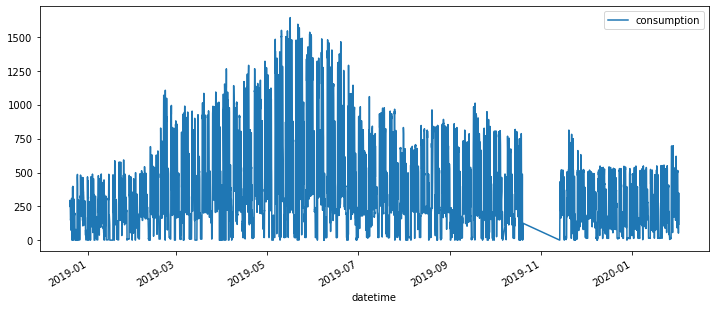

In [10]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [11]:
df.nlargest(10,'consumption')

,consumption
datetime,
2019-05-16 12:00:02,1643.0
2019-05-16 11:00:01,1620.0
2019-05-21 15:00:02,1594.0
2019-05-21 16:00:02,1583.0
2019-05-22 14:00:02,1568.0
2019-05-22 15:00:02,1568.0
2019-05-22 12:00:01,1554.0
2019-05-22 13:00:02,1551.0
2019-05-10 15:00:02,1549.0


In [12]:
df = df.reset_index()

In [13]:
df.count()

datetime       9041
consumption    9041
dtype: int64

## Changing dataframe format specific to Prophet Model

In [14]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [15]:
df.count()

ds    9041
y     9041
dtype: int64

In [16]:
df.nlargest(10,'y')

,ds,y
3502,2019-05-16 12:00:02,1643.0
3501,2019-05-16 11:00:01,1620.0
3625,2019-05-21 15:00:02,1594.0
3626,2019-05-21 16:00:02,1583.0
3648,2019-05-22 14:00:02,1568.0
3649,2019-05-22 15:00:02,1568.0
3646,2019-05-22 12:00:01,1554.0
3647,2019-05-22 13:00:02,1551.0
3361,2019-05-10 15:00:02,1549.0
3650,2019-05-22 16:00:01,1548.0


In [17]:
df.y = np.log(df.y)

## Model Fitting

In [18]:
model = Prophet()
model.add_country_holidays(country_name='IN')

In [19]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [20]:
model.train_holiday_names

0                        Republic Day
1                    Independence Day
2                      Gandhi Jayanti
3                              Diwali
4                                Holi
5                       Day of Ashura
6                              Mawlid
7                         Eid al-Fitr
8              Feast of the Sacrifice
9                      New Year's Day
10                        Palm Sunday
11                    Maundy Thursday
12                        Good Friday
13                      Easter Sunday
14                 Feast of Pentecost
15    Fest of St. Theresa of Calcutta
16        Feast of the Blessed Virgin
17                     All Saints Day
18                      All Souls Day
19                      Christmas Day
20                         Boxing Day
21               Feast of Holy Family
dtype: object

## Predictions

In [21]:
# future = model.make_future_dataframe(periods=365)

In [22]:
# future.head()

In [23]:
prediction=model.predict(df)

In [24]:
org_prediction = prediction.copy()

In [25]:
# prediction[prediction.columns[1:]] = np.exp(prediction[prediction.columns[1:]])

In [26]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3788,2019-05-28 10:00:02,5.792616,5.705163,8.882382,5.792616,5.792616,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.837360,0.837360,0.837360,0.0,0.0,0.0,7.298707
3789,2019-05-28 11:00:01,5.792433,5.806946,8.897992,5.792433,5.792433,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.808119,0.808119,0.808119,0.0,0.0,0.0,7.296958
3620,2019-05-21 10:00:02,5.786307,5.585654,8.875120,5.786307,5.786307,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.837360,0.837360,0.837360,0.0,0.0,0.0,7.292397
3621,2019-05-21 11:00:02,5.786389,5.705742,8.885684,5.786389,5.786389,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.808110,0.808110,0.808110,0.0,0.0,0.0,7.290889
4005,2019-06-06 11:00:02,5.752733,5.529095,8.848723,5.752733,5.752733,0.0,0.0,0.0,0.0,...,0.236936,0.236936,0.236936,0.591393,0.591393,0.591393,0.0,0.0,0.0,7.277453
3452,2019-05-14 10:00:02,5.768805,5.694273,8.867710,5.768805,5.768805,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.837360,0.837360,0.837360,0.0,0.0,0.0,7.274895
3453,2019-05-14 11:00:02,5.769085,5.595683,8.704949,5.769085,5.769085,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.808110,0.808110,0.808110,0.0,0.0,0.0,7.273585
3956,2019-06-04 10:00:02,5.761739,5.689830,8.914012,5.761739,5.761739,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.837360,0.837360,0.837360,0.0,0.0,0.0,7.267829
3957,2019-06-04 11:00:03,5.761555,5.643443,8.813464,5.761555,5.761555,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.808102,0.808102,0.808102,0.0,0.0,0.0,7.266030
4004,2019-06-06 10:00:01,5.752917,5.610701,8.869181,5.752917,5.752917,0.0,0.0,0.0,0.0,...,0.236936,0.236936,0.236936,0.599645,0.599645,0.599645,0.0,0.0,0.0,7.258191


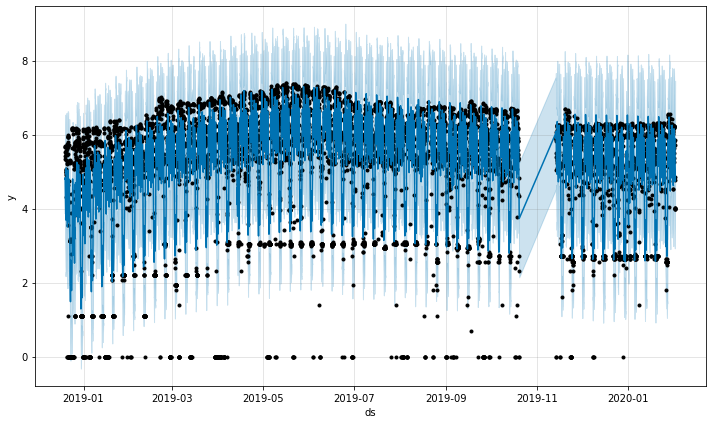

In [27]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

In [28]:
# prediction[prediction.columns[1:]] = np.exp(prediction[prediction.columns[1:]])

/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



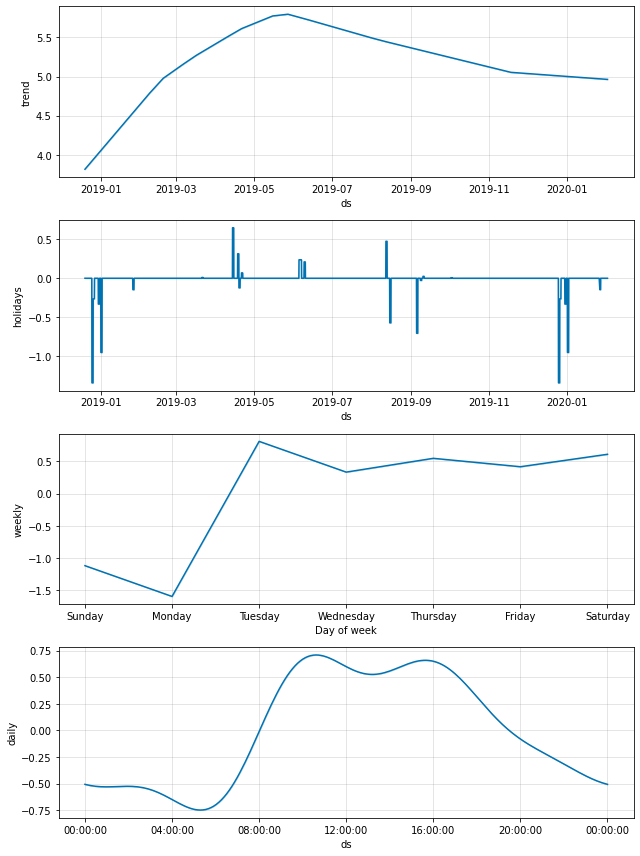

In [29]:
fig = model.plot_components(prediction)

In [30]:
df.head()

,ds,y
0,2018-12-19 15:00:02,5.521461
1,2018-12-19 16:00:03,5.686975
2,2018-12-19 18:00:02,5.662960
3,2018-12-19 19:00:02,5.655992
4,2018-12-19 20:00:02,5.433722


In [31]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,3.814817,3.187254,6.329091,3.814817,3.814817,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.345758,0.345758,0.345758,0.0,0.0,0.0,4.796911
1,2018-12-19 16:00:03,3.815620,3.171452,6.537260,3.815620,3.815620,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.368403,0.368403,0.368403,0.0,0.0,0.0,4.833683
2,2018-12-19 18:00:02,3.817225,3.058544,6.186670,3.817225,3.817225,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.415798,0.415798,0.415798,0.0,0.0,0.0,4.548180
3,2018-12-19 19:00:02,3.818028,2.823661,6.012930,3.818028,3.818028,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.439736,0.439736,0.439736,0.0,0.0,0.0,4.348041
4,2018-12-19 20:00:02,3.818831,2.720190,5.884633,3.818831,3.818831,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.463299,0.463299,0.463299,0.0,0.0,0.0,4.200940


## Errors

In [32]:
true_val = df.y

In [33]:
pred_val = org_prediction['yhat']

In [34]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

1.5374071041218187

In [35]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

0.7330797809699594

In [36]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
mean_absolute_percentage_error(y_true=true_val,y_pred=pred_val)

/home/kanish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in true_divide



inf

In [38]:
# df_cv = cross_validation(model, initial='300 days', period='35 days', horizon='70 days')
# df_cv.head()

In [39]:
# performance_metrics_results = performance_metrics(df_cv)
# print(performance_metrics_results)

In [40]:
# plot_cross_validation_metric(df_cv, metric='mape')

## Prediction

In [41]:
data = ['2019-10-27 12:00:00']
test = pd.DataFrame(data, columns = ['ds']) 

In [42]:
test.ds

0    2019-10-27 12:00:00
Name: ds, dtype: object

In [43]:
val = model.predict(test)

/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [44]:
# val[val.columns[1:]] = np.exp(val[val.columns[1:]])

In [45]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-27 12:00:00,5.138428,2.232192,5.318335,5.138428,5.138428,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-2.026737,-2.026737,-2.026737,0.0,0.0,0.0,3.710763


In [46]:
np.exp(val['yhat'])

0    40.884983
Name: yhat, dtype: float64

## Saving Model

In [47]:
type(model)

fbprophet.forecaster.Prophet

In [48]:
pkl_path = "model.pkl"

In [49]:
model.stan_backend.logger = None

In [50]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [51]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)